In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics


### Query 1
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [68]:
data = pd.read_csv('GOLD.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [69]:
data.shape


(512, 9)

In [70]:
data.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [71]:
 data.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
Pred         True
new         False
dtype: bool

In [72]:
dataset = data.dropna()
dataset.shape

(411, 9)

In [73]:
x = dataset[['Price', 'Open', 'High', 'Low']]
y = dataset['Pred']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 50)

In [75]:
x_train

,Price,Open,High,Low
114,29800,29750,29817,29660
25,29049,29319,29345,28951
99,29584,29620,29680,29450
90,30271,30350,30470,30221
337,29981,30015,30170,29951
361,30614,30399,30660,30376
194,30182,30320,30650,30160
144,29375,29475,29500,29357
48,27871,27805,27929,27702
188,30074,30285,30285,30004


In [76]:
linearmodel = LinearRegression()
linearmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
coeff_df = pd.DataFrame(linearmodel.coef_,x.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [78]:
y_pred = linearmodel.predict(x_test)


In [79]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
df

,Actual,Predicted
148,850.0,850.0
319,263.0,263.0
89,336.0,336.0
273,28.0,28.0
141,365.0,365.0
215,527.0,527.0
225,183.0,183.0
100,85.0,85.0
270,219.0,219.0
359,904.0,904.0


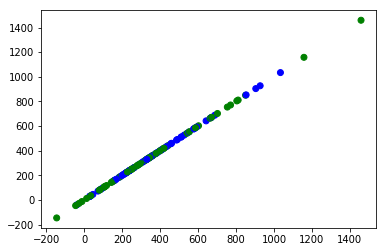

In [80]:
plt.scatter(y_test,y_pred,c=['g','b'])
plt.show()

In [81]:
data['Pred'] = linearmodel.predict(data[['Price','Open','High','Low']])

In [82]:
data.shape


(512, 9)

In [83]:
data.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
Pred        False
new         False
dtype: bool

In [84]:

data.shape


(512, 9)

In [85]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

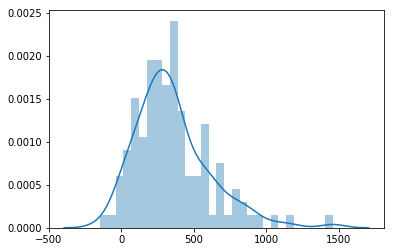

In [86]:
sns.distplot(y_pred, bins = 30)

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9096924758389745e-11
Mean Squared Error: 3.654943344547751e-22
Root Mean Squared Error: 1.9117906121089074e-11


In [88]:
X = dataset[['Price', 'Open', 'High', 'Low']]
Y = dataset['new']

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 50)

In [90]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
Coeff_df = pd.DataFrame(linearmodel.coef_,X.columns,columns = ['Coefficient'])
Coeff_df

,Coefficient
Price,1.012366
Open,-1.001098
High,1.004875
Low,-1.016177


In [92]:
Y_pred = linearmodel.predict(X_test)


In [93]:
df1 = pd.DataFrame({'Actual' : Y_test , 'Predicted' : Y_pred})
df1

,Actual,Predicted
148,65.808933,65.882271
319,100.163344,99.912468
89,578.119827,578.710784
273,465.586074,466.137457
141,72.288144,71.987054
215,76.440567,76.281407
225,410.515652,411.112633
100,129.134591,128.769299
270,472.816104,473.651310
359,35.481350,35.678783


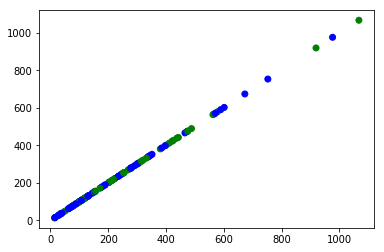

In [94]:
plt.scatter(Y_test,Y_pred,c=['g','b'])
plt.show()

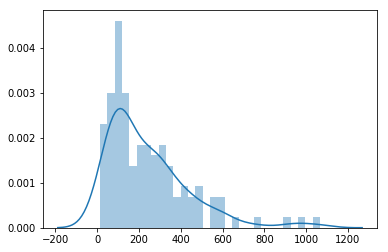

In [95]:
sns.distplot(Y_pred, bins = 30)

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.36099768099291496
Mean Squared Error: 0.20765460031731328
Root Mean Squared Error: 0.4556913432547444


In [97]:
import pandas as pd
import statsmodels.formula.api as smf

In [98]:
Reliance = pd.read_csv('RELIANCE.csv ')
Reliance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
5,RELIANCE,EQ,22-May-2017,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87
6,RELIANCE,EQ,23-May-2017,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61
7,RELIANCE,EQ,24-May-2017,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43
8,RELIANCE,EQ,25-May-2017,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97
9,RELIANCE,EQ,26-May-2017,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05


In [99]:
Reliance = Reliance[Reliance.Series == 'EQ']
Reliance.index = Reliance.Date 
Nifty = pd.read_csv('Nifty50.csv')
Nifty.index = Nifty.Date
prices = pd.concat([Reliance['Close Price'],Nifty['Close']],axis=1)
prices.columns = ['Reliance','Nifty']
prices

,Reliance,Nifty
Date,,
15-May-2017,1344.10,9445.40
16-May-2017,1356.30,9512.25
17-May-2017,1353.10,9525.75
18-May-2017,1327.35,9429.45
19-May-2017,1318.85,9427.90
22-May-2017,1324.15,9438.25
23-May-2017,1305.55,9386.15
24-May-2017,1297.70,9360.55
25-May-2017,1302.45,9509.75


In [100]:
returns = prices.pct_change()
returns = returns.dropna(axis=0)
returns

,Reliance,Nifty
Date,,
16-May-2017,0.009077,0.007078
17-May-2017,-0.002359,0.001419
18-May-2017,-0.019030,-0.010109
19-May-2017,-0.006404,-0.000164
22-May-2017,0.004019,0.001098
23-May-2017,-0.014047,-0.005520
24-May-2017,-0.006013,-0.002727
25-May-2017,0.003660,0.015939
26-May-2017,0.026757,0.008975


In [101]:
returns = returns.iloc[-60:,:]
returns

,Reliance,Nifty
Date,,
11-Feb-2019,-0.019136,-0.005007
12-Feb-2019,0.002513,-0.005271
13-Feb-2019,-0.008317,-0.003485
14-Feb-2019,-0.017457,-0.004410
15-Feb-2019,0.016541,-0.002015
18-Feb-2019,-0.019567,-0.007781
19-Feb-2019,-0.003278,-0.003440
20-Feb-2019,0.015007,0.012363
21-Feb-2019,0.010167,0.005067


In [102]:

model = smf.ols(' Reliance ~ Nifty',data = returns)
model = model .fit()
model.params


Intercept   -0.001029
Nifty        1.650944
dtype: float64

In [103]:
prices['month'] = prices.index.str.slice(3)
prices.month

Date
15-May-2017    May-2017
16-May-2017    May-2017
17-May-2017    May-2017
18-May-2017    May-2017
19-May-2017    May-2017
22-May-2017    May-2017
23-May-2017    May-2017
24-May-2017    May-2017
25-May-2017    May-2017
26-May-2017    May-2017
29-May-2017    May-2017
30-May-2017    May-2017
31-May-2017    May-2017
01-Jun-2017    Jun-2017
02-Jun-2017    Jun-2017
05-Jun-2017    Jun-2017
06-Jun-2017    Jun-2017
07-Jun-2017    Jun-2017
08-Jun-2017    Jun-2017
09-Jun-2017    Jun-2017
12-Jun-2017    Jun-2017
13-Jun-2017    Jun-2017
14-Jun-2017    Jun-2017
15-Jun-2017    Jun-2017
16-Jun-2017    Jun-2017
19-Jun-2017    Jun-2017
20-Jun-2017    Jun-2017
21-Jun-2017    Jun-2017
22-Jun-2017    Jun-2017
23-Jun-2017    Jun-2017
                 ...   
27-Mar-2019    Mar-2019
28-Mar-2019    Mar-2019
29-Mar-2019    Mar-2019
01-Apr-2019    Apr-2019
02-Apr-2019    Apr-2019
03-Apr-2019    Apr-2019
04-Apr-2019    Apr-2019
05-Apr-2019    Apr-2019
08-Apr-2019    Apr-2019
09-Apr-2019    Apr-2019
10-Apr-2019

In [104]:
month = np.zeros((25,2),dtype = float)
for i,j in enumerate (prices.month.unique()):
    temp = prices[prices.month == j]
    month[i] = temp.iloc[-1:,0:2]
month

array([[ 1340.7 ,  9621.25],
       [ 1380.  ,  9520.9 ],
       [ 1615.2 , 10077.1 ],
       [ 1594.5 ,  9917.9 ],
       [  780.9 ,  9788.6 ],
       [  940.85, 10335.3 ],
       [  921.55, 10226.55],
       [  921.05, 10530.7 ],
       [  961.3 , 11027.7 ],
       [  954.55, 10492.85],
       [  882.7 , 10113.7 ],
       [  963.3 , 10739.35],
       [  921.35, 10736.15],
       [  972.45, 10714.3 ],
       [ 1186.  , 11356.5 ],
       [ 1241.65, 11680.5 ],
       [ 1257.95, 10930.45],
       [ 1061.25, 10386.6 ],
       [ 1167.55, 10876.75],
       [ 1121.25, 10862.55],
       [ 1227.15, 10830.95],
       [ 1231.05, 10792.5 ],
       [ 1363.25, 11623.9 ],
       [ 1392.8 , 11748.15],
       [ 1232.05, 11148.2 ]])

In [105]:
month = pd.DataFrame(month)
month.columns = ['reliance','Nifty']
month.index = prices['month'].unique()
month

,reliance,Nifty
May-2017,1340.70,9621.25
Jun-2017,1380.00,9520.90
Jul-2017,1615.20,10077.10
Aug-2017,1594.50,9917.90
Sep-2017,780.90,9788.60
Oct-2017,940.85,10335.30
Nov-2017,921.55,10226.55
Dec-2017,921.05,10530.70
Jan-2018,961.30,11027.70
Feb-2018,954.55,10492.85


In [116]:
Return = month.pct_change()
Return = Return.dropna()
Return


,reliance,Nifty
Jun-2017,0.029313,-0.010430
Jul-2017,0.170435,0.058419
Aug-2017,-0.012816,-0.015798
Sep-2017,-0.510254,-0.013037
Oct-2017,0.204828,0.055851
Nov-2017,-0.020513,-0.010522
Dec-2017,-0.000543,0.029741
Jan-2018,0.043700,0.047195
Feb-2018,-0.007022,-0.048501
Mar-2018,-0.075271,-0.036134


In [118]:
Model = smf.ols('reliance ~ Nifty',data = Return)
Model = Model.fit()
Model.params

Intercept   -0.004837
Nifty        2.014743
dtype: float64